# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `helper_functions`: Objects with all the functions.

In [4]:
import sys

sys.path.append("..")

from imp import reload
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from helper_functions import data_utils, preprocessing, ml_model, evaluation
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
from sklearn.linear_model import LogisticRegression

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [5]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')
app_normalized = preprocessing.categorical_columns(app_normalized)

In [6]:
app_normalized.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,FLAG_PROFESSIONAL_PHONE,...,AGE,PAYMENT_DAY_C,PERSONAL_MONTHLY_INCOME_LEVEL,EXTRA_INCOME,FLAG_CARDS,HAS_BANKING_ACCOUNTS,HAS_SPECIAL_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1,3,1,1,RN,Y,1 - 2 years,1,N,Y,...,32,1 - 14,501 - 1000,N,Y,N,N,N,0,1
1,1,2,0,1,RJ,Y,< 1 year,1,Y,Y,...,34,15 - 30,501 - 1000,N,N,N,N,N,0,1
2,1,2,0,1,RN,Y,1 - 2 years,1,N,Y,...,27,1 - 14,< 500,N,N,N,N,N,0,0
3,1,2,0,1,PE,N,1 - 2 years,1,N,N,...,61,15 - 30,< 500,N,N,N,N,N,0,0
4,1,2,0,1,RJ,Y,< 1 year,1,N,Y,...,48,1 - 14,1001 - 1500,N,N,N,N,N,0,1


In [7]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   POSTAL_ADDRESS_TYPE            50000 non-null  category
 1   MARITAL_STATUS                 50000 non-null  category
 2   QUANT_DEPENDANTS               50000 non-null  category
 3   NACIONALITY                    50000 non-null  category
 4   RESIDENCIAL_STATE              50000 non-null  category
 5   FLAG_RESIDENCIAL_PHONE         50000 non-null  category
 6   MONTHS_IN_RESIDENCE            50000 non-null  category
 7   FLAG_EMAIL                     50000 non-null  category
 8   COMPANY                        50000 non-null  category
 9   FLAG_PROFESSIONAL_PHONE        50000 non-null  category
 10  OCCUPATION_TYPE                50000 non-null  category
 11  PRODUCT                        50000 non-null  category
 12  AGE                            5

### Encoding

- we encode data to convert categorical variables into numerical values so that they can be easily fitted to a machine learning model. 

- Pandas has its own function for encoding:
    - `get_dummies`: It creates a new binary column for each unique value in the categorical variable, where a value of 1 indicates that the original column contained that value, and 0 indicates that it did not


* Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [8]:
app_dum = ml_model.encoding(app_normalized, True) # True for pandas get_dummies
# app_enc = ml_model.encoding(app_normalized, False) # False for different encoder

In [9]:
print(app_dum.columns)

Index(['POSTAL_ADDRESS_TYPE_2', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3',
       'QUANT_DEPENDANTS_1', 'QUANT_DEPENDANTS_2', 'QUANT_DEPENDANTS_3',
       'QUANT_DEPENDANTS_4', 'NACIONALITY_2', 'RESIDENCIAL_STATE_AL',
       'RESIDENCIAL_STATE_AM',
       ...
       'PERSONAL_MONTHLY_INCOME_LEVEL_1501 - 2000',
       'PERSONAL_MONTHLY_INCOME_LEVEL_501 - 1000',
       'PERSONAL_MONTHLY_INCOME_LEVEL_< 500', 'EXTRA_INCOME_Y', 'FLAG_CARDS_Y',
       'HAS_BANKING_ACCOUNTS_Y', 'HAS_SPECIAL_BANKING_ACCOUNTS_Y',
       'HAS_PERSONAL_ASSETS_Y', 'HAS_CARS_1', 'TARGET_LABEL_BAD=1'],
      dtype='object', length=147)


#### get accepted samples

In [10]:
X_train, y_train, X_test, y_test, X_val, y_val = data_utils.get_feature(app_dum) 
X_train_reshape, y_train_reshape = data_utils.resampling(X_train, y_train)

In [11]:
logistic_model = LogisticRegression(penalty='l2', solver='sag', multi_class='auto', max_iter=500)

In [12]:
logistic_model.fit(X_train_reshape, y_train_reshape)

LogisticRegression(max_iter=500, solver='sag')

In [13]:
res_clases_val = logistic_model.predict(X_val)

In [14]:
X_val_full = X_val.copy()
X_val_full["class"] = res_clases_val

In [15]:
X_val_full[X_val_full["class"]==0].head(1).T.iloc[50:150,:]

,30825
AGE_18,False
AGE_19,False
AGE_20,False
AGE_21,False
AGE_22,False
...,...
HAS_BANKING_ACCOUNTS_Y,False
HAS_SPECIAL_BANKING_ACCOUNTS_Y,False
HAS_PERSONAL_ASSETS_Y,False
HAS_CARS_1,False


In [16]:
len(app_dum.columns)

147

In [17]:
reload(ml_model)

<module 'helper_functions.ml_model' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis/src/notebooks/../helper_functions/ml_model.py'>

/home/chris/miniconda3/envs/finany/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/chris/miniconda3/envs/finany/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best Score for Logistic Regression:  0.6870882352941176
model score for Logistic Regression: 0.688


Model Performance metrics:
------------------------------
Accuracy: 0.6864
Precision: 0.7561600390339107
Recall: 0.845010905125409
F1 Score: 0.7981202523496846

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      7336
           1       0.37      0.25      0.30      2664

    accuracy                           0.69     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.65      0.69      0.66     10000


Prediction Confusion Matrix:
------------------------------
      0     1
0  6199  1137
1  1999   665


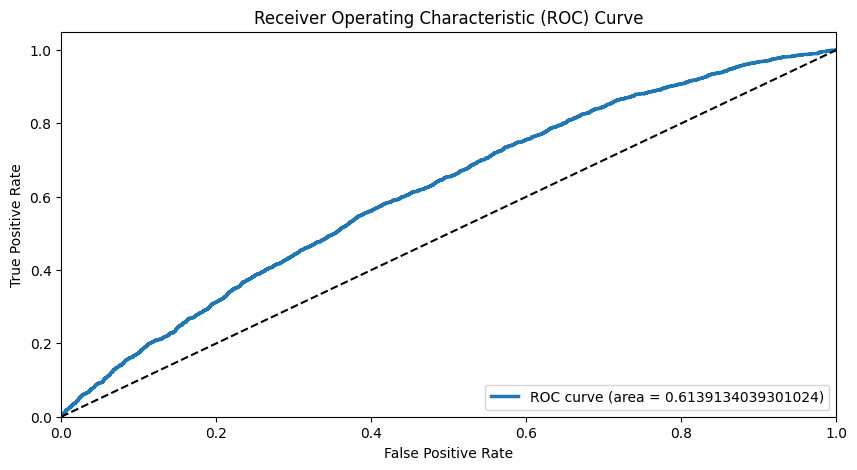

Best Score for Logistic Regression:  0.6870882352941176


In [18]:
# using get_dummies
lr_model_enc = ml_model.model_logistic_regression(app_dum, True)

Model Performance metrics:
------------------------------
Accuracy: 0.5542
Precision: 0.7957254418413481
Recall: 0.5278080697928026
F1 Score: 0.6346500573676446

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.53      0.63      7336
           1       0.33      0.63      0.43      2664

    accuracy                           0.55     10000
   macro avg       0.56      0.58      0.53     10000
weighted avg       0.67      0.55      0.58     10000


Prediction Confusion Matrix:
------------------------------
      0     1
0  3872  3464
1   994  1670


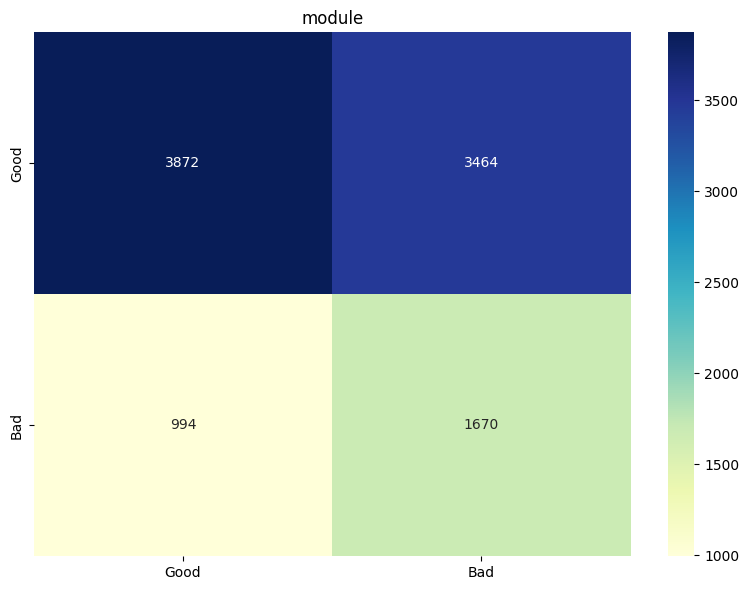

In [19]:

plt.figure(figsize=(8,6))

class_weights = {0:1,1:3}
model = LogisticRegression(C=0.1,max_iter=200,class_weight=class_weights)
model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = evaluation.get_performance(y_pred, y_test)
# cast df data
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=['Good', 'Bad'], 
    index=['Good', 'Bad']
)
# plot confusion matrix
sns.heatmap(data=cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title(ml_model.__class__.__name__)
plt.tight_layout()
plt.show()

In [20]:
lr_model_enc.best_params_

{'C': 0.1, 'class_weight': {0: 1, 1: 2}}

In [22]:
#ml_model.model_catboost_classifier(app_dum, True)

### Comparing different models

Model Performance metrics:
------------------------------
Accuracy: 0.6864
Precision: 0.7561600390339107
Recall: 0.845010905125409
F1 Score: 0.7981202523496846

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      7336
           1       0.37      0.25      0.30      2664

    accuracy                           0.69     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.65      0.69      0.66     10000



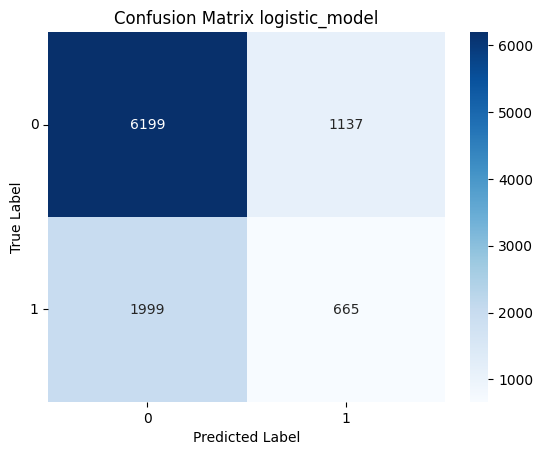

Model Performance metrics:
------------------------------
Accuracy: 0.7279
Precision: 0.741698963025034
Recall: 0.9652399127589967
F1 Score: 0.8388319611443463

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      7336
           1       0.44      0.07      0.13      2664

    accuracy                           0.73     10000
   macro avg       0.59      0.52      0.48     10000
weighted avg       0.66      0.73      0.65     10000



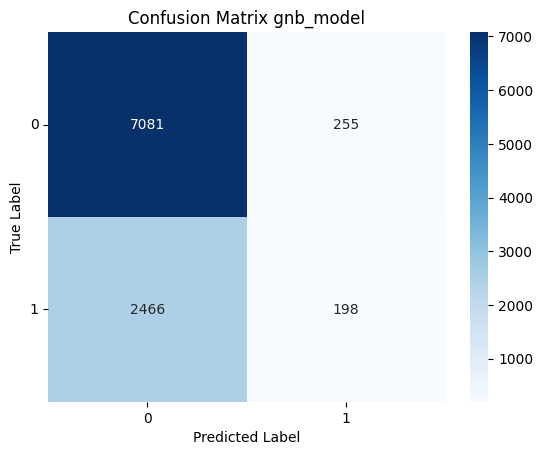

Model Performance metrics:
------------------------------
Accuracy: 0.6876
Precision: 0.7555825242718447
Recall: 0.8486913849509269
F1 Score: 0.7994350282485876

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      7336
           1       0.37      0.24      0.29      2664

    accuracy                           0.69     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.65      0.69      0.66     10000



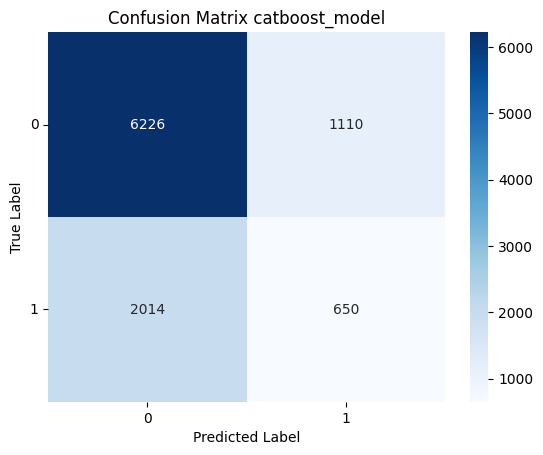

Model Performance metrics:
------------------------------
Accuracy: 0.6305
Precision: 0.7477207783371888
Recall: 0.7490458015267175
F1 Score: 0.7483827034388831

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7336
           1       0.31      0.30      0.30      2664

    accuracy                           0.63     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.63      0.63      0.63     10000



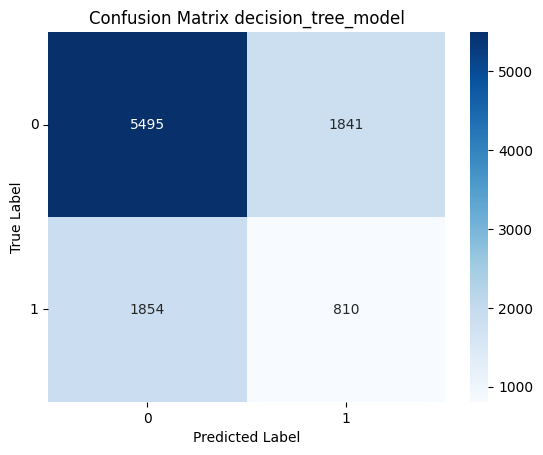

Model Performance metrics:
------------------------------
Accuracy: 0.7174
Precision: 0.7375684787189212
Recall: 0.9543347873500545
F1 Score: 0.8320656049441407

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      7336
           1       0.34      0.06      0.11      2664

    accuracy                           0.72     10000
   macro avg       0.54      0.51      0.47     10000
weighted avg       0.63      0.72      0.64     10000



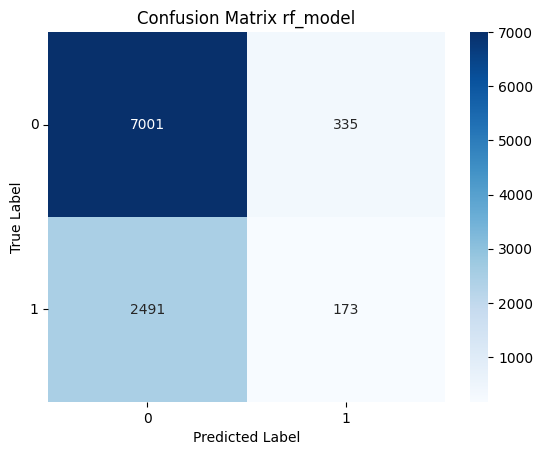

In [24]:
reload(preprocessing)
reload(ml_model)
ml_model.basic_models(app_dum,save_model=True)